# **MOVIE GENRE CLASSIFICATION**

Data Sets :- [Click Here](https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [ ]:
# Genre list for reference and fallback genre
genre_list = ['action', 'adult', 'adventure', 'animation', 'biography', 'comedy',
              'crime', 'documentary', 'family', 'fantasy', 'game-show', 'history',
              'horror', 'music', 'musical', 'mystery', 'news', 'reality-tv',
              'romance', 'sci-fi', 'short', 'sport', 'talk-show', 'thriller',
              'war', 'western']
fallback_genre = 'unknown'


In [ ]:
# Load and preprocess the training data
try:
    with tqdm(total=50, desc='Loading Train Data') as pbar:
        train_data = pd.read_csv('/content/train_data.txt', sep=':::', header=None,
                                 names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'], engine='python')
        pbar.update(50)
except Exception as e:
    print("Error loading train data:", e)
    raise

train_data['GENRE'] = train_data['GENRE'].str.strip().str.lower()
X_train = train_data['DESCRIPTION'].str.lower()

Loading Train Data: 100%|██████████| 50/50 [00:00<00:00, 204.27it/s]


In [ ]:
# Process and binarize the genre labels
genre_labels = train_data['GENRE'].str.split(', ')
mlb = MultiLabelBinarizer(classes=genre_list)
y_train = mlb.fit_transform(genre_labels)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:900: UserWarning: unknown class(es) ['drama'] will be ignored
  warnings.warn(


In [ ]:
# Vectorize the training data
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
with tqdm(total=50, desc='Vectorizing Training Data') as pbar:
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    pbar.update(50)

Vectorizing Training Data: 100%|██████████| 50/50 [00:01<00:00, 32.26it/s]


In [ ]:
# Split the data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_tfidf, y_train, test_size=0.2, random_state=42)


In [ ]:
# Define the models with hyperparameter tuning
naive_bayes = MultinomialNB()
random_forest = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
gradient_boosting = GradientBoostingClassifier(n_estimators=200, max_depth=5, random_state=42)

models = {
    "Naive Bayes": MultiOutputClassifier(naive_bayes),
    "Random Forest": MultiOutputClassifier(random_forest),
    "Gradient Boosting": MultiOutputClassifier(gradient_boosting)
}

Training Naive Bayes: 100%|██████████| 50/50 [00:00<00:00, 296.05it/s]



Naive Bayes - Validation Metrics:
Accuracy: 35.30%
Precision: 0.75
Recall: 0.15
F1-score: 0.25


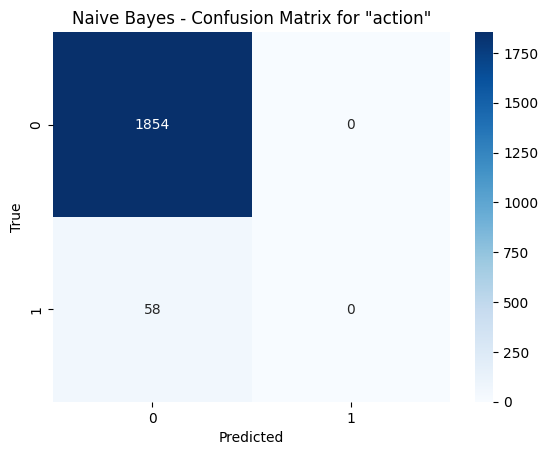

Training Random Forest: 100%|██████████| 50/50 [01:20<00:00,  1.62s/it]



Random Forest - Validation Metrics:
Accuracy: 25.26%
Precision: 0.92
Recall: 0.01
F1-score: 0.02


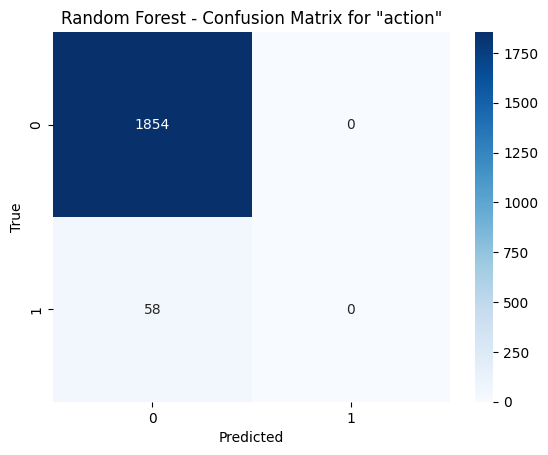

Training Gradient Boosting: 100%|██████████| 50/50 [26:08<00:00, 31.36s/it]



Gradient Boosting - Validation Metrics:
Accuracy: 35.88%
Precision: 0.44
Recall: 0.25
F1-score: 0.32


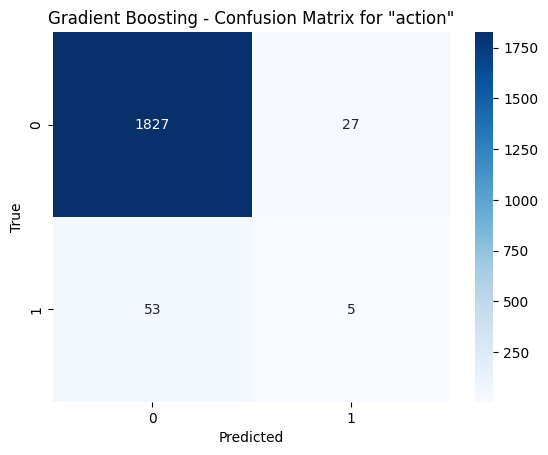

In [ ]:
# Train models and evaluate on validation set
results = {}

for model_name, model in models.items():
    with tqdm(total=50, desc=f'Training {model_name}') as pbar:
        model.fit(X_train_split, y_train_split)
        pbar.update(50)

    y_val_pred = model.predict(X_val_split)

    accuracy = accuracy_score(y_val_split, y_val_pred)
    precision = precision_score(y_val_split, y_val_pred, average='micro')
    recall = recall_score(y_val_split, y_val_pred, average='micro')
    f1 = f1_score(y_val_split, y_val_pred, average='micro')

    results[model_name] = (accuracy, precision, recall, f1)

    # Print metrics
    print(f"\n{model_name} - Validation Metrics:")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")

    # Plot confusion matrix for one genre
    genre_index = 0  # Example for the first genre (e.g., 'action')
    cm = confusion_matrix(y_val_split[:, genre_index], y_val_pred[:, genre_index])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix for "{genre_list[genre_index]}"')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()



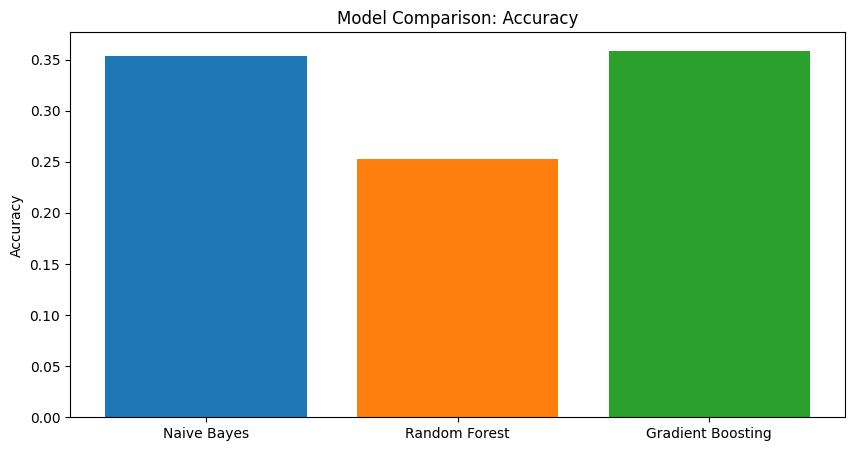

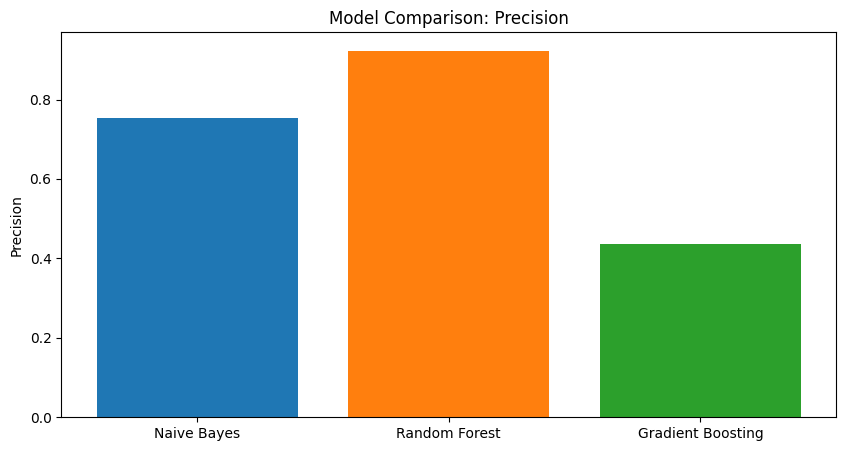

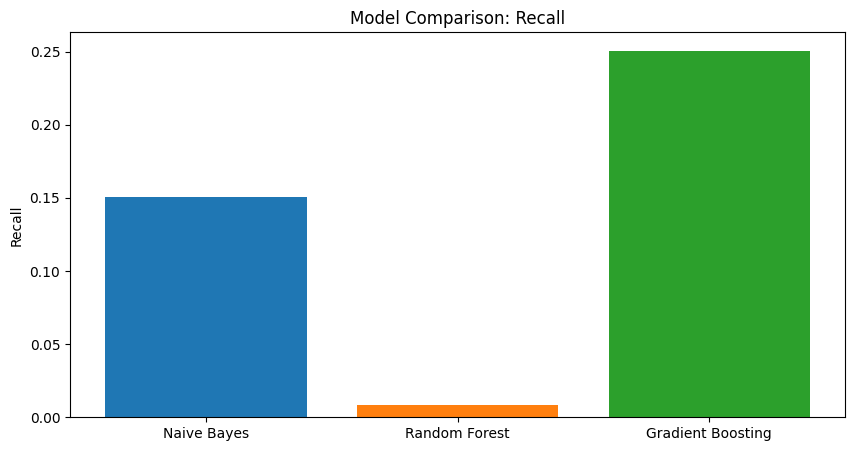

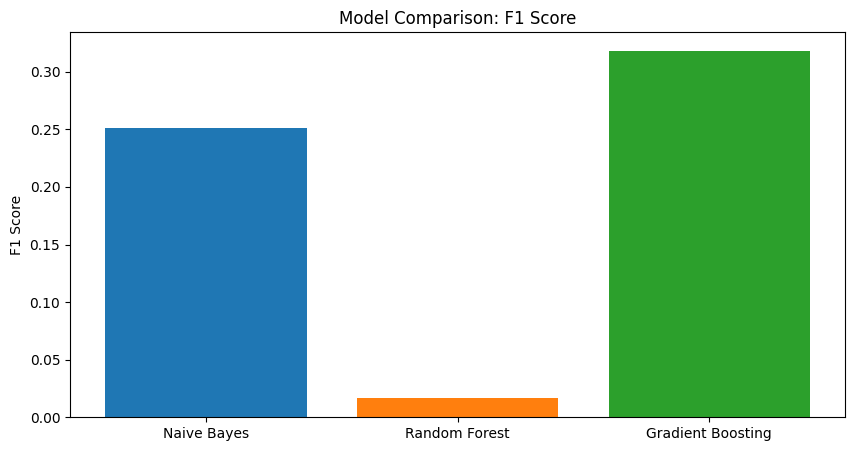

In [ ]:
# Plot comparison of models
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for i, metric in enumerate(labels):
    plt.figure(figsize=(10, 5))
    for model_name, scores in results.items():
        plt.bar(model_name, scores[i], label=model_name)
    plt.title(f'Model Comparison: {metric}')
    plt.ylabel(metric)
    plt.show()


In [ ]:
# Load test data
try:
    with tqdm(total=50, desc="Loading Test Data") as pbar:
        test_data = pd.read_csv('/content/test_data.txt', sep=':::', header=None,
                                names=['ID', 'TITLE', 'DESCRIPTION'], engine='python')
        pbar.update(50)
except Exception as e:
    print(f"Error loading test_data: {e}")
    raise

Loading Test Data: 100%|██████████| 50/50 [00:00<00:00, 67.84it/s]


In [ ]:
# Preprocess and vectorize the test data
X_test = test_data['DESCRIPTION'].str.lower()
with tqdm(total=50, desc="Vectorizing Test Data") as pbar:
    X_test_tfidf = tfidf_vectorizer.transform(X_test)
    pbar.update(50)

Vectorizing Test Data: 100%|██████████| 50/50 [00:04<00:00, 11.74it/s]


In [ ]:
# Predict genres using the best model (e.g., Random Forest)
best_model = models['Random Forest']
with tqdm(total=50, desc="Predicting on Test Data") as pbar:
    y_pred = best_model.predict(X_test_tfidf)
    pbar.update(50)

Predicting on Test Data: 100%|██████████| 50/50 [01:00<00:00,  1.21s/it]


In [ ]:
# Prepare the output for test data
test_movie_names = test_data['TITLE']
predicted_genres = mlb.inverse_transform(y_pred)
test_results = pd.DataFrame({'MOVIE_NAME': test_movie_names, 'PREDICTED_GENRES': predicted_genres})

# Replace empty predicted genres with the fallback genre
test_results['PREDICTED_GENRES'] = test_results['PREDICTED_GENRES'].apply(lambda genres: [fallback_genre] if not genres else genres)


In [ ]:
# Write the test results to an output file
with open("/content/test_data_solution.txt", "w", encoding="utf-8") as output_file:
    for _, row in test_results.iterrows():
        movie_name = row['MOVIE_NAME']
        genre_str = ', '.join(row['PREDICTED_GENRES'])
        output_file.write(f"{movie_name}::: {genre_str}\n")

In [ ]:
# Save the model evaluation metrics to a file
with open("model_evaluation.txt", "w", encoding="utf-8") as output_file:  # 'w' mode will overwrite any existing content
    output_file.write("\n\nModel Evaluation Metrics:\n")
    for model_name, scores in results.items():
        output_file.write(f"{model_name} - Accuracy: {scores[0] * 100:.2f}%, Precision: {scores[1]:.2f}, Recall: {scores[2]:.2f}, F1-score: {scores[3]:.2f}\n")

print("Model evaluation metrics saved successfully.")

Model evaluation metrics saved successfully.
